## <center>Predict whether the Employee of an Organization should get Promotion or Not?</center>

In [1]:
# Import all the required libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import imblearn

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from feature_engine.imputation import CategoricalImputer
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

In [2]:
# Load the data
data = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73,0


In [4]:
data.shape

(54808, 13)

In [5]:
data.dtypes

employee_id               int64
department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
awards_won?               int64
avg_training_score        int64
is_promoted               int64
dtype: object


employee_id is unique to every employee and doesn't influence promotion, so it can be dropped.

department, region, education, gender, recruitment_channel are categorical variables

no_of_trainings, age, length_of_service, awards_won?, avg_training_score, and is_promoted are integer variables
previous_year_rating is floating point variable

In [6]:
data.describe(include = 'object')

,department,region,education,gender,recruitment_channel
count,54808,54808,52399,54808,54808
unique,9,34,3,2,3
top,Sales & Marketing,region_2,Bachelor's,m,other
freq,16840,12343,36669,38496,30446


department, region, education, gender, recruitment_channel has 9, 34, 3, 2 and 3 unique values respectively

In [7]:
data['department'].value_counts()

Sales & Marketing    16840
Operations           11348
Technology            7138
Procurement           7138
Analytics             5352
Finance               2536
HR                    2418
Legal                 1039
R&D                    999
Name: department, dtype: int64

In [8]:
data['education'].value_counts()

Bachelor's          36669
Master's & above    14925
Below Secondary       805
Name: education, dtype: int64

In [9]:
data['recruitment_channel'].value_counts()

other       30446
sourcing    23220
referred     1142
Name: recruitment_channel, dtype: int64

In [10]:
data['gender'].value_counts()

m    38496
f    16312
Name: gender, dtype: int64

In [11]:
data.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,99.000000,1.000000


In [12]:
data['is_promoted'].value_counts()

0    50140
1     4668
Name: is_promoted, dtype: int64

In [13]:
test.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,9,10
0,0,1.225034,-0.467064,0.790291,-0.406443,-1.421486,-0.521453,-1.136398,-0.160635,0.695215,-0.557557,-0.130297
1,1,-1.172164,-0.467064,-1.265357,-0.406443,-0.466090,-0.521453,-0.150871,-0.160635,-1.098125,-0.557557,-0.724611
2,2,0.825501,-0.467064,0.790291,-0.406443,-0.466090,-2.269900,-0.397253,-0.160635,-1.374024,-2.254762,-0.816044
3,3,0.026435,-0.467064,-1.265357,3.135047,-0.466090,-1.395676,0.834656,-0.160635,-0.132480,-1.406160,2.566976
4,4,-1.571697,-0.467064,0.790291,-0.406443,-0.602575,0.352770,0.341892,-0.160635,-0.408379,0.291046,-0.496029


In [14]:
test.shape

(23490, 12)

C:\Users\sreer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


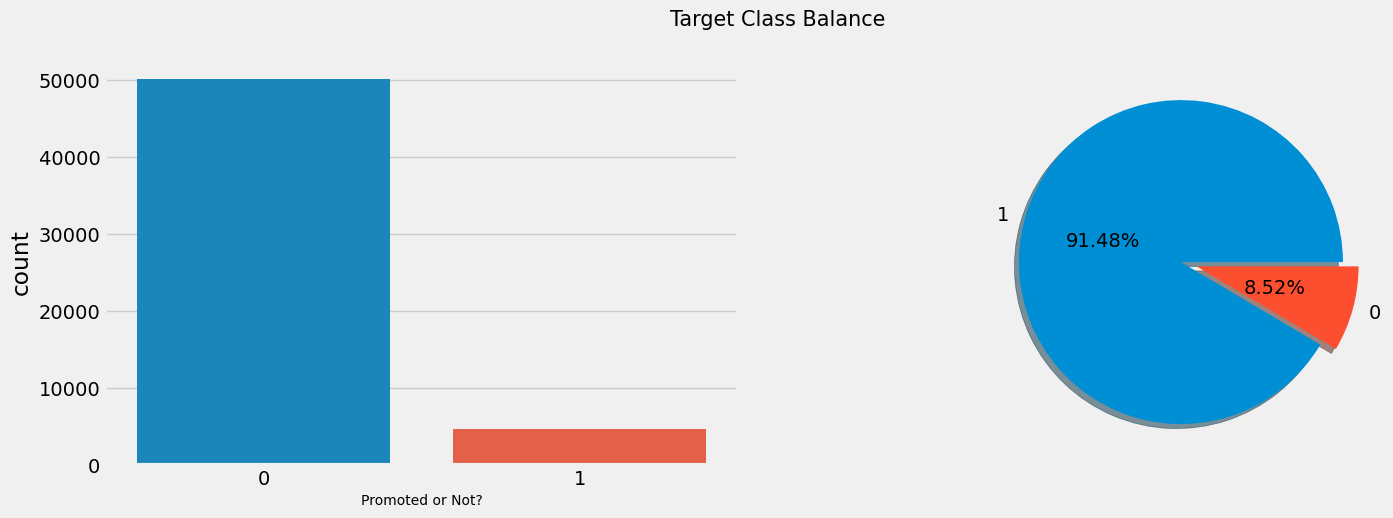

In [15]:
# Plotting the Target Class Balance

# setting up the size of the figures
plt.rcParams['figure.figsize'] = (16, 5)

# setting up the style of the plot
plt.style.use('fivethirtyeight')

plt.subplot(1, 2, 1)
sns.countplot(data['is_promoted'],)

plt.xlabel('Promoted or Not?', fontsize = 10)

plt.subplot(1, 2, 2)
data['is_promoted'].value_counts().plot(kind = 'pie', explode = [0, 0.1], autopct = '%.2f%%', startangle = 0,
                                       labels = ['1','0'], shadow = True, pctdistance = 0.5)
plt.axis('off')

plt.suptitle('Target Class Balance', fontsize = 15)
plt.show()

In [16]:
# Total no. of missing values in the dataset
train_missing_data = pd.concat([data.isnull().sum(), test.isnull().sum()],
                                axis=1, 
                                keys=['Train_Total','Test_Total'],
                                sort = True)
train_missing_data

,Train_Total,Test_Total
0,NaN,0.0
1,NaN,0.0
10,NaN,0.0
2,NaN,0.0
3,NaN,0.0
4,NaN,0.0
5,NaN,0.0
6,NaN,0.0
7,NaN,0.0
8,NaN,0.0


The dataset has missing values in the columns education and previous_year rating in both train and test data. The missing values in the categorical column viz., education will be filled using Categorical Imputer and the numerical column viz., previous_year_rating using fillna() method.

In [17]:
# Imputing the categorical variable 'education' using 'frequent' imputation method
datatr = CategoricalImputer(variables=['education'],imputation_method='frequent').fit_transform(data)
datatest= CategoricalImputer(variables=['education'],imputation_method='frequent').fit_transform(test)

KeyError: "None of [Index(['education'], dtype='object')] are in the [columns]"

In [ ]:
data['previous_year_rating'].value_counts()

In [ ]:
# Imputing the numerical variable 'previous_year_rating' using pandas fillna() method
datatr['previous_year_rating'].fillna(datatr['previous_year_rating'].median(), inplace=True)
datatest['previous_year_rating'].fillna(datatest['previous_year_rating'].median(), inplace=True)

Since the variable has only 5 unique values 1,2,3,4,5 and no decimals in between, imputing with mean values can include values with decimals. Hence median was chosen.

In [ ]:
# Total no. of missing values in the dataset
train_missing_data_new = pd.concat([datatr.isnull().sum(), datatest.isnull().sum()],
                                axis=1, 
                                keys=['Train_Total','Test_Total'],
                                sort = True)
train_missing_data_new

## Outlier Detection

In [ ]:
datatr.select_dtypes('number').head()

In [ ]:
datatr['no_of_trainings'].value_counts()

In [ ]:
datatr['awards_won?'].value_counts()

In [ ]:
datatr['avg_training_score'].value_counts()

In [ ]:
datatr['length_of_service'].value_counts()

avg_training_score and length_of_service might have outliers.

In [ ]:
# Boxplots for columns 
plt.rcParams['figure.figsize'] = (15, 5)
plt.style.use('fivethirtyeight')

# Box plot for average training score
plt.subplot(1, 2, 1)
sns.boxplot(datatr['avg_training_score'], color = 'red')
plt.xlabel('Average Training Score', fontsize = 12)
plt.ylabel('Range', fontsize = 12)

# Box plot for length of service
plt.subplot(1, 2, 2)
sns.boxplot(datatr['length_of_service'], color = 'red')
plt.xlabel('Length of Service', fontsize = 12)
plt.ylabel('Range', fontsize = 12)

plt.suptitle('Box Plot', fontsize = 20)
plt.show()

In [ ]:
datatr[datatr['length_of_service'] > 13]

There are 3489 outliers in the variable length_of_service. These values can be deleted.

In [ ]:
# lets plot pie chart for the columns where we have very few categories
plt.rcParams['figure.figsize'] = (16,5)
plt.style.use('fivethirtyeight')

# plotting a pie chart to represent share of Previous year Rating of the Employees
plt.subplot(1, 2, 1)
labels = ['1', '2', '3', '4', '5']
sizes = datatr['previous_year_rating'].value_counts()
colors = plt.cm.Wistia(np.linspace(0, 1, 5))
explode = [0, 0, 0, 0, 0.1]

plt.pie(sizes, labels = labels, colors = colors, explode = explode, shadow = True, startangle = 90)
plt.title('Previous year Ratings', fontsize = 20)
plt.legend()

# plotting a pie chart to represent share of Previous year Rating of the Employees
plt.subplot(1, 2, 2)
labels = ['0', '1']
sizes = datatr['awards_won?'].value_counts()
colors = plt.cm.Wistia(np.linspace(0, 1, 5))
explode = [0,0.1]

plt.pie(sizes, labels = labels, colors = colors, explode = explode, shadow = True, startangle = 90)
plt.title('Awards Won?', fontsize = 20)


plt.legend()
plt.show()

The previous year's rating is low for most employees, with only a few being recognized with awards.

In [ ]:
#distribution of trainings undertaken by the employees

plt.rcParams['figure.figsize'] = (17, 4)
sns.countplot(datatr['no_of_trainings'], palette = 'autumn')
plt.xlabel(' ', fontsize = 16)
plt.title('Distribution of Trainings undertaken by the Employees')
plt.show()

The majority of employees have completed training only once, while only a negligible number of employees have taken the training more than three times.

In [ ]:
#Age of the Employees

plt.rcParams['figure.figsize'] = (8, 4)
plt.hist(datatr['age'], color = 'green')
plt.title('Distribution of Age among the Employees', fontsize = 15)
plt.xlabel('Age of the Employees')
plt.grid()
plt.show()

In [ ]:
#Departments

plt.rcParams['figure.figsize'] = (12, 6)
sns.countplot(y = datatr['department'], palette = 'spring', orient = 'v')
plt.xlabel('')
plt.ylabel('Department Name')
plt.title('Distribution of Employees in Different Departments', fontsize = 15)
plt.grid()

plt.show()

In [ ]:
#distribution of different Regions

plt.rcParams['figure.figsize'] = (12,15)
plt.style.use('fivethirtyeight')
sns.countplot(y = datatr['region'], palette = 'cividis', orient = 'v')
plt.xlabel('')
plt.ylabel('Region')
plt.title('Different Regions', fontsize = 15)
plt.xticks(rotation = 90)
plt.grid()
plt.show()

In [ ]:
# lets plot pie chart for the columns where we have very few categories
plt.rcParams['figure.figsize'] = (16,5)

# plotting a pie chart to represent share of Previous year Rating of the Employees
plt.subplot(1, 3, 1)
labels = datatr['education'].value_counts().index
sizes = datatr['education'].value_counts()
colors = plt.cm.copper(np.linspace(0, 1, 5))
explode = [0, 0, 0.1]

plt.pie(sizes, labels = labels, colors = colors, explode = explode, shadow = True, startangle = 90)
plt.title('Education', fontsize = 20)

# plotting a pie chart to represent share of Previous year Rating of the Employees
plt.subplot(1, 3, 2)
labels = datatr['gender'].value_counts().index
sizes = datatr['gender'].value_counts()
colors = plt.cm.copper(np.linspace(0, 1, 5))
explode = [0, 0]

plt.pie(sizes, labels = labels, colors = colors, explode = explode, shadow = True, startangle = 90)
plt.title('Gender', fontsize = 20)

# plotting a pie chart to represent share of Previous year Rating of the Employees
plt.subplot(1, 3, 3)
labels = datatr['recruitment_channel'].value_counts().index
sizes = datatr['recruitment_channel'].value_counts()
colors = plt.cm.copper(np.linspace(0, 1, 5))
explode = [0,0,0.1]

plt.pie(sizes, labels = labels, colors = colors, explode=explode,shadow = True, startangle = 0)
plt.title('Recruitment Channel', fontsize = 20)

plt.show()

Very few of the employees have a qualification of below secondary and most of the employees have a Bachelor's degree. Female employees are less than male employees. Referred employees are a minority and majority of the recruitment is through sourcing and other channels

## Bivariate Analysis

Categorical vs Categorical Analysis using Stacked and Grouped Bar Charts with the help of crosstab function

In [ ]:
# Gender Gap in the promotion

import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (15, 3)
x = pd.crosstab(datatr['gender'], datatr['is_promoted'])
colors = plt.cm.Wistia(np.linspace(0, 1, 5))
x.div(x.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = False)
plt.title('Effect of Gender on Promotion', fontsize = 15)
plt.xlabel(' ')
plt.show()

Even though the number of female employees are lower than that of male employees, it doesn't have an effect on promotion. Both the genders are having similar chances of promotion

In [ ]:
#effect of different Departments and Promotion

plt.rcParams['figure.figsize'] = (15,4)
x = pd.crosstab(datatr['department'], datatr['is_promoted'])
colors = plt.cm.Wistia(np.linspace(0, 1, 5))
x.div(x.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True)
plt.title('Effect of Department on Promotion', fontsize = 15)
plt.xticks(rotation = 20)
plt.xlabel(' ')
plt.show()

All the departments have similar levels of promotion. 

Categorical vs Numerical Analysis using Bar Charts, Box plots, Strip plots, Swarm plots, Boxen plots, Violin Plots, etc

In [ ]:
# Effect of Age on the Promotion

plt.rcParams['figure.figsize'] = (15,4)
sns.boxenplot(datatr['is_promoted'], datatr['age'], palette = 'inferno')
plt.title('Effect of Age on Promotion', fontsize = 15)
plt.xlabel('Is the Employee Promoted?', fontsize = 10)
plt.ylabel('Age of the Employee', fontsize = 10)
plt.show()

In [ ]:
# Department Vs Average Training Score

plt.rcParams['figure.figsize'] = (16, 7)
sns.boxplot(datatr['department'], datatr['avg_training_score'], palette = 'PuRd')
plt.title('Average Training Scores from each Department', fontsize = 15)
plt.ylabel('Promoted or not', fontsize = 10)
plt.xlabel('Departments', fontsize = 10)
plt.show()

Numerical vs Numerical Analysis using Scatter plots

In [ ]:
# Age Vs Length of service

plt.rcParams['figure.figsize'] = (16, 7)
sns.scatterplot(datatr['age'], datatr['length_of_service'], palette = 'PuRd')
plt.title('Age Vs Length of service', fontsize = 15)
plt.ylabel('Promoted or not', fontsize = 10)
plt.xlabel('Departments', fontsize = 10)
plt.show()

## Multivariate Analysis

In [ ]:
# lets check the Heat Map for the Data with respect to correlation.

plt.rcParams['figure.figsize'] = (15, 8)
sns.heatmap(datatr.corr(), annot = True, linewidth = 0.5, cmap = 'Wistia')
plt.title('Correlation Heat Map', fontsize = 15)
plt.show()

In [ ]:
# relation of Departments and Promotions when they won awards ?

plt.rcParams['figure.figsize'] = (16, 7)
sns.barplot(datatr['department'], datatr['avg_training_score'], hue = datatr['gender'], palette = 'spring')
plt.title('Chances of Promotion in each Department when they have won some Awards too', fontsize = 15)
plt.ylabel('Promoted or not', fontsize = 10)
plt.xlabel('Departments', fontsize = 10)
plt.show()

## Feature Engineering

In [ ]:
# lets create some extra features from existing features to improve our Model

# creating a Metric of Sum
datatr['sum_metric'] = datatr['awards_won?']+ datatr['previous_year_rating']
datatest['sum_metric'] = datatest['awards_won?'] + datatest['previous_year_rating']

# creating a total score column
datatr['total_score'] = datatr['avg_training_score'] * datatr['no_of_trainings']
datatest['total_score'] = datatest['avg_training_score'] * datatest['no_of_trainings']

In [ ]:
#Dropping irrelevant fields
datatr = datatr.drop(['recruitment_channel', 'region', 'employee_id'], axis = 1)
datatest = datatest.drop(['recruitment_channel', 'region', 'employee_id'], axis = 1)

# lets check the columns in train and test data set after feature engineering
datatr.columns

In [ ]:
#The no. of employee who did not get an award, previous_year_rating as 1 and avg_training score is less than 60 but, still got promotion.
datatr[(datatr['previous_year_rating'] == 1.0) & (datatr['awards_won?'] == 0) & (datatr['avg_training_score'] < 60) & (datatr['is_promoted'] == 1)]

In [ ]:
datatr = datatr.drop(datatr[(datatr['previous_year_rating'] == 1.0) & (datatr['awards_won?'] == 0) & (datatr['avg_training_score'] < 60) & (datatr['is_promoted'] == 1)].index)

In [ ]:
#categorical columns present in the data
datatr.select_dtypes('object').head()

In [ ]:
datatr['education'].value_counts()

The education variable is ordinal and hence the values should be encoded according to their degree of importance 

In [ ]:
# Encoding these categorical columns to convert them into numerical columns

# Encode the education in their degree of importance 
datatr['education'] = datatr['education'].replace(("Master's & above", "Bachelor's", "Below Secondary"),
                                                (3, 2, 1))
datatest['education'] = datatest['education'].replace(("Master's & above", "Bachelor's", "Below Secondary"),
                                                (3, 2, 1))

# lets use Label Encoding for Gender and Department to convert them into Numerical
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
datatr['department'] = le.fit_transform(datatr['department'])
datatest['department'] = le.fit_transform(datatest['department'])
datatr['gender'] = le.fit_transform(datatr['gender'])
datatest['gender'] = le.fit_transform(datatest['gender'])

# lets check whether we still have any categorical columns left after encoding
print(datatr.select_dtypes('object').columns)
print(datatest.select_dtypes('object').columns)

In [ ]:
datatr

In [ ]:
y = datatr['is_promoted']
x = datatr.drop(['is_promoted'], axis = 1)
x_test = datatest

The dataset is very imbalanced as observed from the value_counts of the target variable. 

In [ ]:
from imblearn.over_sampling import SMOTE

x_resample, y_resample  = SMOTE().fit_resample(x, y.values.ravel())

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(x_resample, y_resample, test_size = 0.2, random_state = 0)

In [ ]:
#Scaling the values
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_valid = sc.transform(x_valid)
x_test = sc.transform(x_test)

In [ ]:
# create models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting' : GradientBoostingClassifier(random_state=42)
}

# train and evaluate models
for name, model in models.items():

    # fit model
    model.fit(x_train, y_train)

    # make predictions
    y_pred = model.predict(x_valid)

    # print metrics
    print(f'Model: {name}')
    print(f'Accuracy: {accuracy_score(y_valid,y_pred)}')
    print(f'Precision: {precision_score(y_valid,y_pred)}')
    print(f'Recall: {recall_score(y_valid,y_pred)}')
    print(f'F1 Score: {f1_score(y_valid,y_pred)}')
    print(f'Classification Report: {classification_report(y_valid,y_pred)}')
    print('\n')


In [ ]:
# Define input shape
input_shape = (x_train.shape[1],)

# Define the model architecture
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=input_shape),
    layers.Dense(64, activation='tanh'),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_valid, y_valid)

# Print the test accuracy
print('Test accuracy:', test_acc)
print(classification_report(y_valid, y_pred))

In [ ]:
selected_model = RandomForestClassifier()
selected_model.fit(x_train, y_train)
y_test = selected_model.predict(x_test)

In [ ]:
y_test

In [ ]:
df = pd.DataFrame(y_test)

In [ ]:
df.value_counts()

In [ ]:
# saving the dataframe
dftest = pd.DataFrame(x_test)
dftest.to_csv('test.csv')